# Notebook d'analyse univariée et multivariée

## 1. l'importation des outils / bibliothéques et de la base de données déja nettoyée

In [4]:
import numpy as np , matplotlib as plt 
%pylab inline
from scipy import stats
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm

import pandas as pd
%matplotlib inline
import seaborn as sns
from collections import Counter

from sklearn import preprocessing , decomposition , neighbors
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import random

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [67]:
data_nutri = pd.read_csv('cleaned.csv', sep='\t')

In [68]:
data_nutri.describe()

,Unnamed: 0,proteins_100g,iron_100g,energy_100g,carbohydrates_100g,trans-fat_100g,nutrition-score-fr_100g,saturated-fat_100g,additives_n,sugars_100g,fiber_100g,vitamin-c_100g,calcium_100g,sodium_100g,cholesterol_100g,salt_100g,fat_100g,vitamin-a_100g
count,83831.000000,83831.000000,83831.000000,83831.00000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000,83831.000000
mean,88179.293054,7.076220,0.001831,1225.42562,39.204763,0.075565,10.900443,4.883387,3.052713,18.357339,2.232559,0.005463,0.088002,0.554226,0.018979,1.391235,12.332611,0.000105
std,56422.047968,7.343676,0.022224,672.51650,28.169556,1.659769,8.799041,6.434108,2.590194,20.530586,3.397589,0.035857,1.001867,1.725417,0.330542,3.685009,12.797668,0.000359
min,80.000000,0.000000,-0.000260,0.00000,0.000000,-3.570000,-10.000000,0.000000,1.000000,0.000000,0.000000,-0.002100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42427.500000,2.500000,0.000000,628.00000,11.600000,0.000000,2.000000,0.000000,1.000000,2.480000,0.000000,0.000000,0.000000,0.085000,0.000000,0.215900,1.430000,0.000000
50%,85032.000000,5.130000,0.000950,1314.00000,38.180000,0.000000,12.000000,2.160000,2.000000,9.030000,1.200000,0.000000,0.035000,0.333000,0.000000,0.845820,8.770000,0.000000
75%,130050.500000,9.690000,0.002390,1724.00000,64.290000,0.000000,18.000000,7.350000,4.000000,30.300000,3.300000,0.001400,0.100000,0.607000,0.024000,1.541780,20.000000,0.000100
max,320738.000000,100.000000,6.355930,4000.00000,100.000000,369.000000,40.000000,83.330000,31.000000,100.000000,90.000000,3.000000,285.714000,100.000000,95.238000,100.000000,100.000000,0.025500


## 2. L'analyse Univariée

On s'interesse tout debut à la distribution et on vérifie les outliers des differents composants principaux :
    # Energie
    # Sucres
    # Gras (Fats)
    # Proteins
    # SEL
    # Fibre
    # additives

In [69]:
def boxplot_univ (feature,plotColor="#CC9900"):
    sns.set_style("whitegrid")

    plt.figure(figsize=(8,3)) 
    
    sns.boxplot(data=data_nutri, y=feature) 

(0, 0.5)

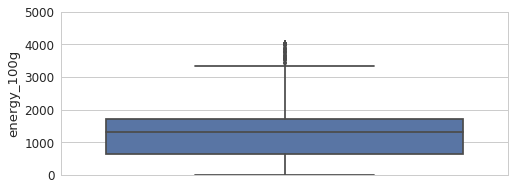

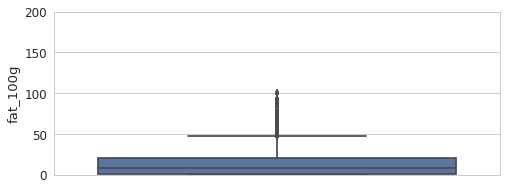

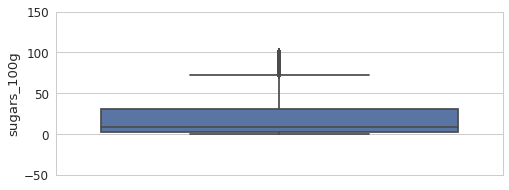

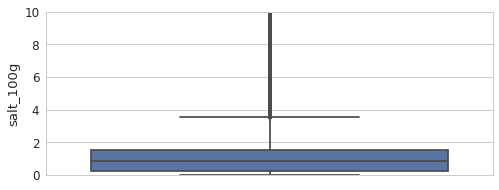

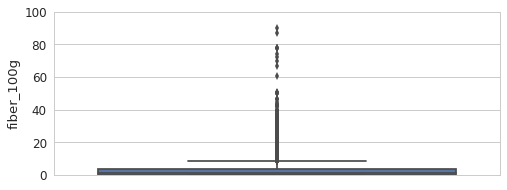

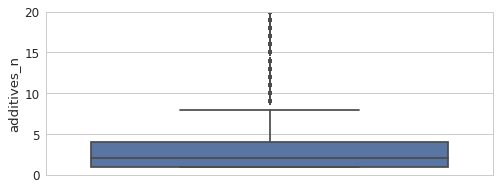

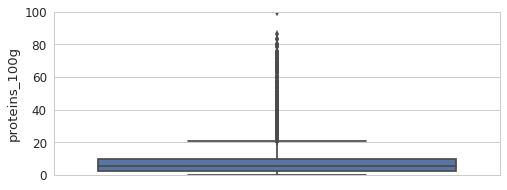

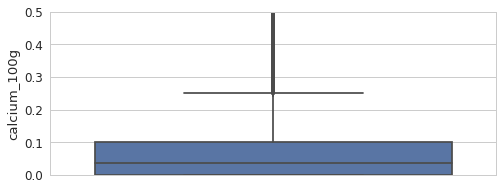

In [70]:
boxplot_univ("energy_100g")
plt.ylim(0, 5000)

boxplot_univ("fat_100g","#FFCC33")
plt.ylim (0, 200)

boxplot_univ("sugars_100g","#33CCFF")
plt.ylim (-50, 150)

boxplot_univ("salt_100g","#F5F5DC")
plt.ylim (0, 10)

boxplot_univ("fiber_100g","#33CC33")
plt.ylim (0, 100)

boxplot_univ("additives_n","purple")
plt.ylim (0, 20)

boxplot_univ("proteins_100g","red")
plt.ylim (0, 100)

boxplot_univ("calcium_100g","#CCCCCC")
plt.ylim (0, 0.5)

### ++ Distrubition par Nutrition grade


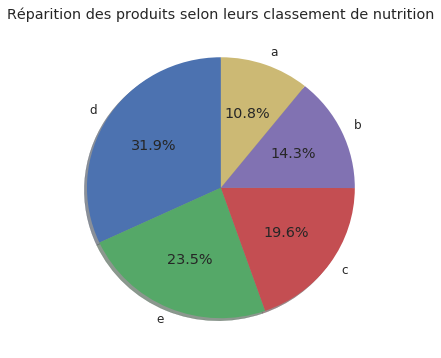

In [71]:
class_nutri = data_nutri['nutrition_grade_fr'].value_counts(normalize=True)
plt.figure(figsize=(6, 6))
pie(class_nutri.values, labels=class_nutri.index,
                autopct='%1.1f%%', shadow=True, startangle=90)
title('Réparition des produits selon leurs classement de nutrition')
show()

### ++ Distrubition par pays 
On s'interesse à voir les pays qui  produisent les plus  en Europe

In [72]:
pays_list = ['France', 'Royaume-Uni', 'Allemagne', 'Suisse', 'Italie']
europe = data_nutri[data_nutri['countries_fr'].isin(pays_list)]



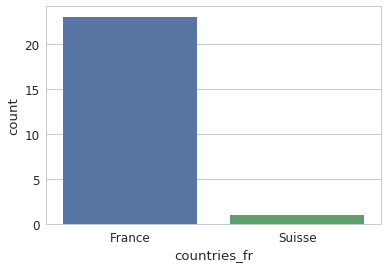

In [73]:
sns.set_style("whitegrid")
sns.countplot(x="countries_fr", data=europe)

La france représente le pays qui produise le plus en Europe

## II. Analyse multivariée

L'analyse effectué a pour objectif de voir la relation du score nutritionnel avec les composants principaux cités au dessus 

In [74]:
def boxplot_multiv (feature,plotColor="#CC9900"):
  
    plt.figure(figsize=(15, 4)) 
    sns.set_style("whitegrid")

    sns.boxplot(data=data_nutri, x="nutrition_grade_fr",y=feature)

(0, 30)

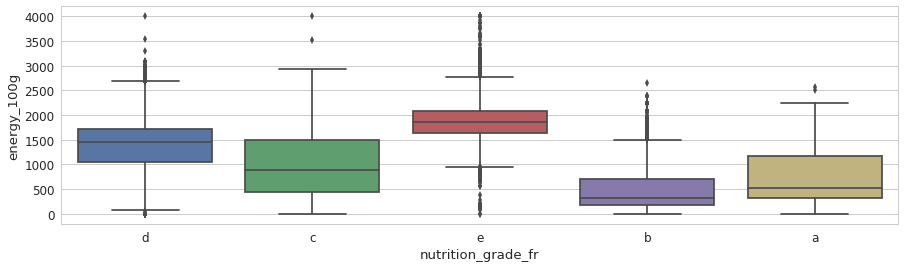

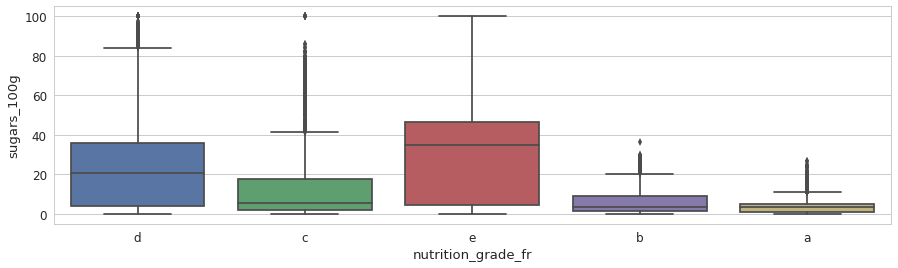

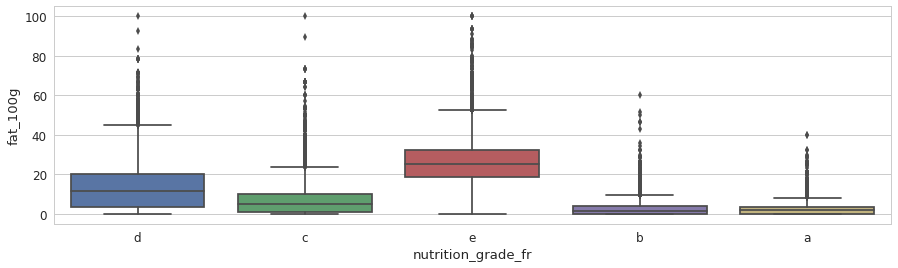

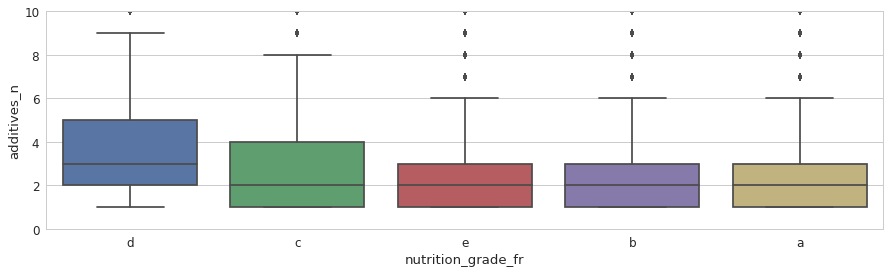

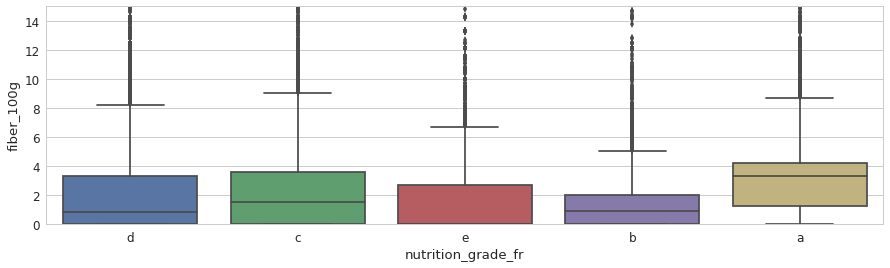

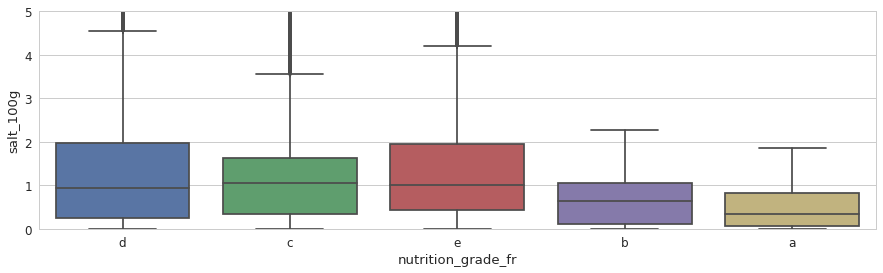

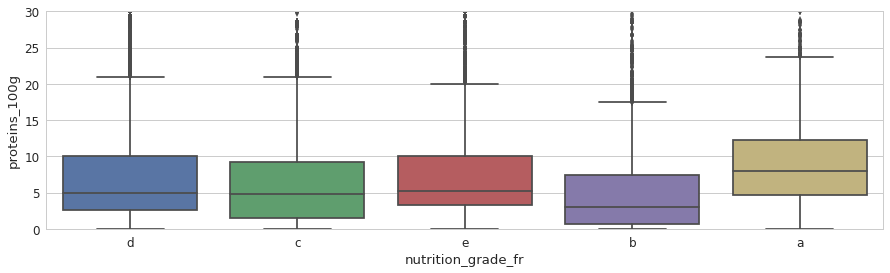

In [75]:
# bivariate boxplot
boxplot_multiv("energy_100g")
boxplot_multiv("sugars_100g","#33CCFF")
boxplot_multiv("fat_100g","yellow")
boxplot_multiv("additives_n","purple")
plt.ylim (0,10)
boxplot_multiv("fiber_100g","green")
plt.ylim (0,15)
boxplot_multiv("salt_100g","white")
plt.ylim (0,5)
boxplot_multiv("proteins_100g","red")
plt.ylim (0,30)

1. Les éléments de grade "E" et "D" contiennent des quantités remarquables du sucre, alors que ceux de grade "A" et "B" contiennent des quantités légéres
2. Pareil pour le gras, les élements de grade " A" et "B" contiennent moins de gras que les autres grades
3. Les proteins semblent existés dans tout les grades des éléments avec des quantités équivalentes, ceci dis qu'un élement mauvais ou bon pour la santé contient une quantité remarquable de proteins.
4. Les élements de grade "E","D","C" contiennent plus d'énérgie et calorie que ceux de grade "A" et "B"

### La relation entre les differents élements 

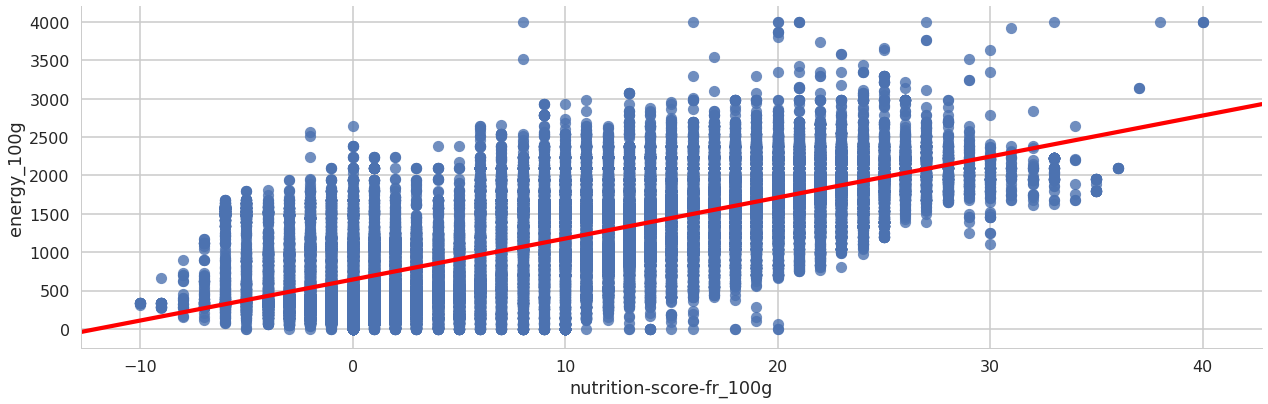

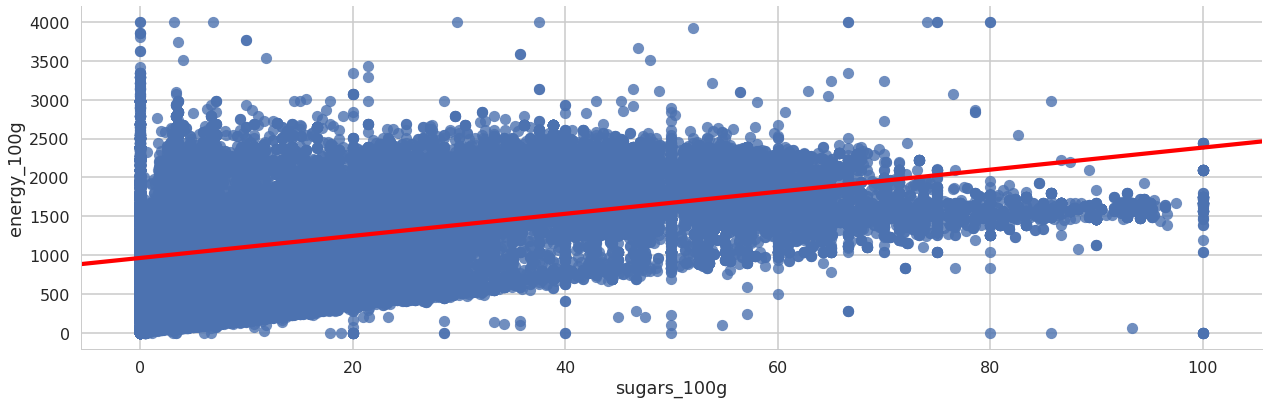

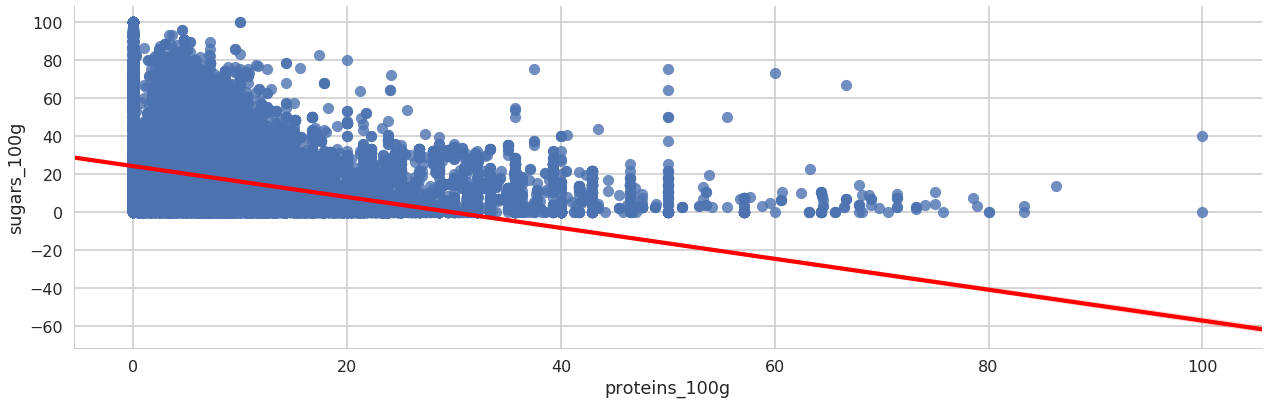

In [76]:
sns.set_style("whitegrid")

with sns.plotting_context(context='poster'):
    sns.lmplot("nutrition-score-fr_100g","energy_100g", data_nutri, line_kws={'color': 'red'}, size=6, aspect=3)
    sns.lmplot("sugars_100g","energy_100g", data_nutri, line_kws={'color': 'red'}, size=6, aspect=3)
    sns.lmplot("proteins_100g","sugars_100g", data_nutri, line_kws={'color': 'red'}, size=6, aspect=3)

1. On peut voir clairement qu'il y'a une relation linéaire entre le sucre et l'energie, et entre l'energie et le score nutritionnel, ce qui est tout a fait logique, l'élément qui contient de sucres sont généralement des élements energétiques, qui contiennent beaucoup de calories.
2. Par contre, le plus qu'il y'a du sucre dans l'élement, le moins de proteins y'en a.

Pour mieux visualiser et comprendre la relation entre les differents composants, j'ai construit la matrice de coorélation

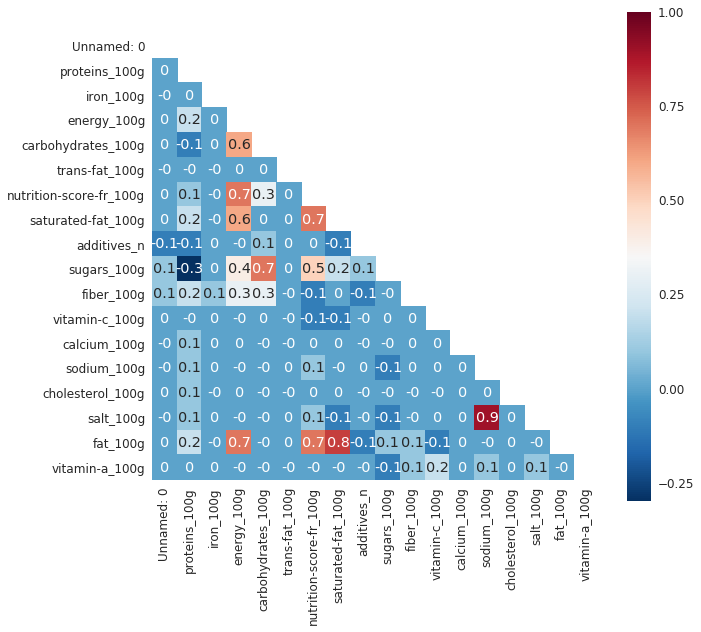

In [77]:
data_nutri.columns
corr = data_nutri.corr()
corr = corr.round(1)
plt.figure(figsize=(10, 9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1.2)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1, cmap="RdBu_r",square=True, mask=mask)

Une forte coorélation entre : 
1. le Soduim et le sel ( ce qui est logique, parce que le soduim entre dans les composant du sel - Chlorure de sodium )
2. le gras et l'energie ainsi que les carbohydrates et l'energie
3. Le sucre et les carbohydrates

### Features Engineering

Apres avoir fait des recherches sur internet et faire quelques analyses de coorélation entre les differents composants, j'ai pu construire trois features pour mieux définir une alimentation saine.
 1. deux feautres faites à partir de sommation des élements qui sont bien coorélés entre eux, un feature qui représente le taux d'éléments biens dans un produit, et l'autre représente le taux d'élements mauvais.
 2. un feature qui indique si le produit est bon ou mauvais pour la santé, en comparant ces deux autres nouveaux features à la moyennes générale des deux features d'autres produits.

In [79]:

mauvaise_nutri = ((data_nutri["cholesterol_100g"]) + data_nutri["trans-fat_100g"]+ data_nutri["saturated-fat_100g"] +  data_nutri["sodium_100g"] + data_nutri["sugars_100g"] + (data_nutri["additives_n"]) + (data_nutri["cholesterol_100g"]))
bon_nutri = ((data_nutri["fiber_100g"]) + (data_nutri["calcium_100g"]) + (data_nutri["vitamin-a_100g"])  + (data_nutri["vitamin-c_100g"]) + (data_nutri["iron_100g"]) + (data_nutri["proteins_100g"]) ) 

data_nutri["bon_nutri"] = bon_nutri 
data_nutri["mauv_nutri"] = mauvaise_nutri



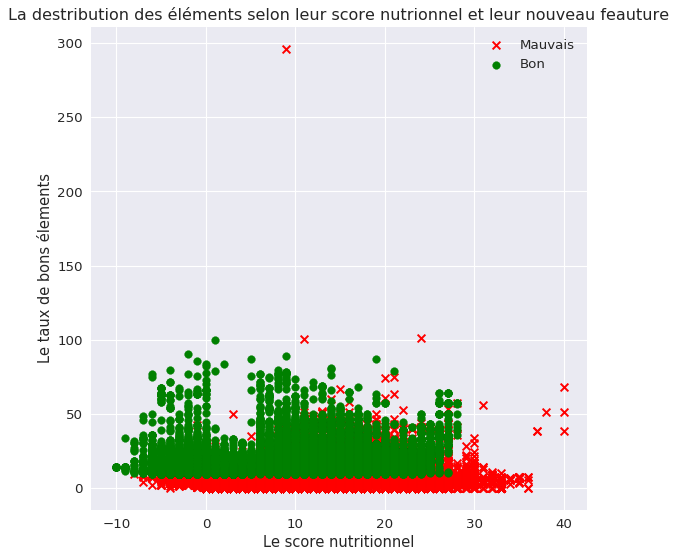

In [117]:

data_nutri['score'] = np.where(((data_nutri["mauv_nutri"]<data_nutri["mauv_nutri"].mean()) & (data_nutri["bon_nutri"]>data_nutri["bon_nutri"].mean())) , 'Bon', 'Mauvais')

plt.figure(figsize=(8, 8), dpi=80)

good = data_nutri[data_nutri["score"]=="Bon"]
bad = data_nutri[data_nutri["score"]=="Mauvais"]


#sns.jointplot(x="mauv_nutri", y="bon_nutri", data=data_nutri ,size=10, ratio=8);

b = plt.scatter(    bad["nutrition-score-fr_100g"],bad["bon_nutri"], color='red',marker="x")
g = plt.scatter(   good["nutrition-score-fr_100g"],good["bon_nutri"], color='green')

plt.title("La destribution des éléments selon leur score nutrionnel et leur nouveau feauture")
plt.xlabel("Le score nutritionnel")
plt.ylabel("Le taux de bons élements")
plt.legend([b,g], ['Mauvais','Bon'])

On peut voir une distinction entre les produits, une relation inverse entre le taux de bons éléments et le score nutritionnel ce qui est tout a fait logique.

Pour mieux comprendre le phénoméne, j'ai fait une petite matrice de coorélation entre les deux features crées et le score nutritionnel

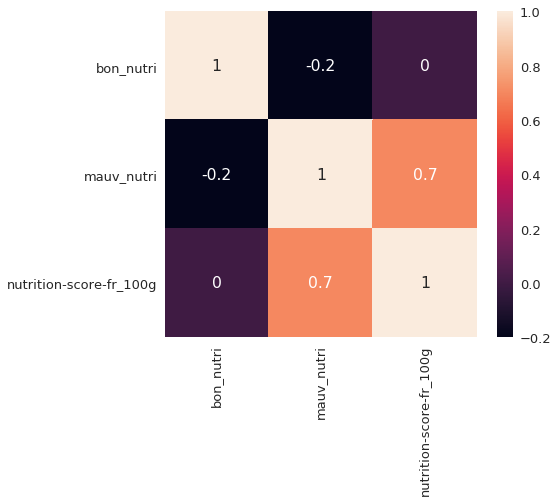

In [119]:
corr = data_nutri[["bon_nutri","mauv_nutri","nutrition-score-fr_100g"]].corr()
corr = corr.round(1)
plt.figure(figsize=(7, 6))

sns.set(font_scale=1.3)
with sns.axes_style("white"):
    sns.heatmap(corr,  annot = True ,vmax=1)

On peut voir clairement qu'il y'a une forte coorélation etre le score nutritionel et le feature "Mavaise nutrition".

In [126]:
nutrigrade = data_nutri["nutrition_grade_fr"]
#nutriscore = data_nutri["nutrition-score-fr_100g"]
nutriscore = data_nutri["score"]

countries = data_nutri["countries_fr"]
D = data_nutri.drop("nutrition_grade_fr",1)
D = D.drop("score",1)
D = D.drop("product_name",1)
D = D.drop("states_fr",1)
D = D.drop("countries_fr",1)
D = D.drop("additives_fr",1)
D = D.drop("nutrition-score-fr_100g",1)
D = D.drop("Unnamed: 0",1)

In [127]:
std_scale = preprocessing.StandardScaler().fit(D)
nutri_scaled = std_scale.transform(D)

In [140]:
pca2 = decomposition.PCA(n_components=8)
pca2.fit(nutri_scaled)
var = pca2.explained_variance_ratio_
var.sum()

0.7654617026052981

In [141]:
reg = linear_model.LinearRegression()


In [142]:
x_train, x_test, y_train, y_test = train_test_split(nutri_scaled,nutriscore,test_size=0.2, random_state=4)


In [143]:
rf = RandomForestClassifier(n_estimators = 3)
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [144]:
rf.score(x_test,y_test)

0.9986282578875172